# Volcano plot

[Volcano plot](https://en.wikipedia.org/wiki/Volcano_plot_(statistics)) is a scatter plot specifically for showing significant levels (e.g., p-value) and fold-changes

In [3]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("/home/yli11/tmp/results.KO_vs_WT.csv",sep="\t",index_col=0)
df.head()

,logFC,AveExpr,t,P.Value,adj.P.Val,B,WT_1_log2CPM,WT_2_log2CPM,WT_3_log2CPM,KO_1_log2CPM,KO_2_log2CPM,KO_3_log2CPM
gene,,,,,,,,,,,,
D17H6S56E-5,-3.0830,9.3418,-97.669,2.276800e-15,3.597600e-11,25.102,10.8880,10.9120,10.8500,7.7671,7.8119,7.8218
Scd1,-2.2133,6.1060,-50.068,1.151200e-12,9.095200e-09,19.799,7.2574,7.1911,7.1920,5.0828,4.9264,4.9864
Coro2a,-1.4558,7.9154,-46.998,2.073900e-12,1.092300e-08,19.285,8.6433,8.6614,8.6256,7.1924,7.2202,7.1495
Plxnb2,-2.9373,3.6346,-42.033,5.854300e-12,1.598600e-08,17.639,5.0743,5.1443,5.1107,2.2122,2.2622,2.0040
Gzmb,-1.8469,4.9198,-41.606,6.436800e-12,1.598600e-08,18.097,5.7934,5.8635,5.8686,3.9655,3.9610,4.0665


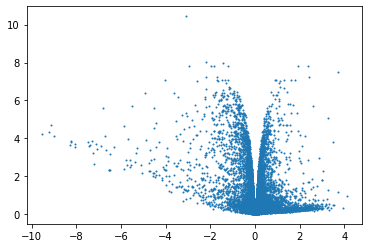

In [7]:
plt.scatter(x=df['logFC'],y=df['adj.P.Val'].apply(lambda x:-np.log10(x)),s=1)

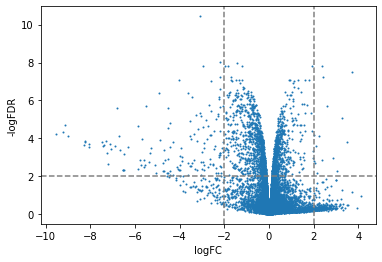

In [13]:
plt.scatter(x=df['logFC'],y=df['adj.P.Val'].apply(lambda x:-np.log10(x)),s=1)
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-2,color="grey",linestyle="--")
plt.axvline(2,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")

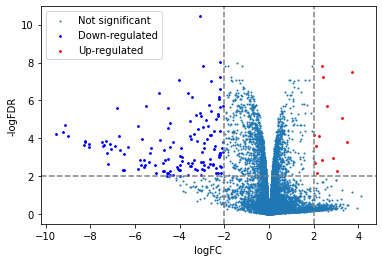

In [16]:
plt.scatter(x=df['logFC'],y=df['adj.P.Val'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down = df[(df['logFC']<=-2)&(df['adj.P.Val']<=0.01)]
up = df[(df['logFC']>=2)&(df['adj.P.Val']<=0.01)]

plt.scatter(x=down['logFC'],y=down['adj.P.Val'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['logFC'],y=up['adj.P.Val'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-2,color="grey",linestyle="--")
plt.axvline(2,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()

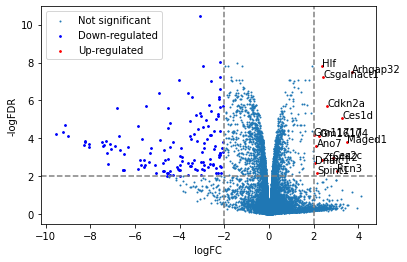

In [28]:


plt.scatter(x=df['logFC'],y=df['adj.P.Val'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down = df[(df['logFC']<=-2)&(df['adj.P.Val']<=0.01)]
up = df[(df['logFC']>=2)&(df['adj.P.Val']<=0.01)]

plt.scatter(x=down['logFC'],y=down['adj.P.Val'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['logFC'],y=up['adj.P.Val'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")
for i,r in up.iterrows():
    plt.text(x=r['logFC'],y=-np.log10(r['adj.P.Val']),s=i)

plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-2,color="grey",linestyle="--")
plt.axvline(2,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()

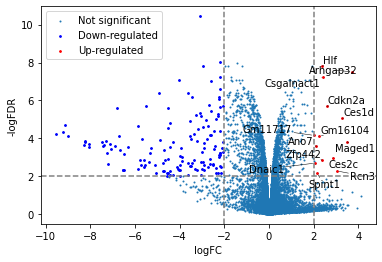

In [31]:

from adjustText import adjust_text

plt.scatter(x=df['logFC'],y=df['adj.P.Val'].apply(lambda x:-np.log10(x)),s=1,label="Not significant")

# highlight down- or up- regulated genes
down = df[(df['logFC']<=-2)&(df['adj.P.Val']<=0.01)]
up = df[(df['logFC']>=2)&(df['adj.P.Val']<=0.01)]

plt.scatter(x=down['logFC'],y=down['adj.P.Val'].apply(lambda x:-np.log10(x)),s=3,label="Down-regulated",color="blue")
plt.scatter(x=up['logFC'],y=up['adj.P.Val'].apply(lambda x:-np.log10(x)),s=3,label="Up-regulated",color="red")
texts=[]
for i,r in up.iterrows():
    texts.append(plt.text(x=r['logFC'],y=-np.log10(r['adj.P.Val']),s=i))
adjust_text(texts,arrowprops=dict(arrowstyle="-", color='black', lw=0.5))
plt.xlabel("logFC")
plt.ylabel("-logFDR")
plt.axvline(-2,color="grey",linestyle="--")
plt.axvline(2,color="grey",linestyle="--")
plt.axhline(2,color="grey",linestyle="--")
plt.legend()

